In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import openpyxl
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # 결측치 시각화
plt.rc("font", family="Malgun Gothic")

import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
# 데이터 불러오기 #  encoding = 'CP949'
data = pd.read_csv('/content/drive/MyDrive/ICICPE_질병관리청 데이터/data.csv')

In [ ]:
df = copy.deepcopy(data)

In [ ]:
'''
'ID': 개인 아이디
'region': 17개 시도
'sex': 성별
'age': 나이
'incom': 소득 4분위수(개인)
'edu': 교육수준
'EC1_1': 경제활동 상태
'cfam': 가구원수 9
'allownc': 기초생활수급 여부 99 >>9
'house': 주택소유여부 9
'marri_2': 결혼상태 9
'D_1_1': 주관적 건강인지 9
'D_2_1': 최근 2주간 몸이 불편했던 경험 유무 9
'BD1_11' : (만12세이상)1년간 음주빈도 9
'BE3_75': 고강도 신체활동 여부: 여가
'BP5': 2주이상 연속 우울감 여부 9
'BP6_10':1년간 자살 생각 여부 9
'mh_stress': 스트레스 인지율
'BS3_1': 현재흡연여부 8 >> 9
'DF2_pr': 우울증 현재 유병 여부  9
'''

"\n'ID': 개인 아이디\n'region': 17개 시도\n'sex': 성별\n'age': 나이\n'incom': 소득 4분위수(개인)\n'edu': 교육수준\n'EC1_1': 경제활동 상태\n'cfam': 가구원수 9\n'allownc': 기초생활수급 여부 99 >>9\n'house': 주택소유여부 9\n'marri_2': 결혼상태 9\n'D_1_1': 주관적 건강인지 9\n'D_2_1': 최근 2주간 몸이 불편했던 경험 유무 9\n'BD1_11' : (만12세이상)1년간 음주빈도 9\n'BE3_75': 고강도 신체활동 여부: 여가\n'BP5': 2주이상 연속 우울감 여부 9\n'BP6_10':1년간 자살 생각 여부 9\n'mh_stress': 스트레스 인지율\n'BS3_1': 현재흡연여부 8 >> 9\n'DF2_pr': 우울증 현재 유병 여부  9\n"

In [ ]:
# 선택한 features로 구성된 df

df = df.loc[:,['region', 'sex', 'age', 'incm', 'edu', 'EC1_1', 'cfam',
       'allownc', 'house', 'marri_2', 'D_1_1', 'D_2_1', 'BD1_11','BE3_75', 'BP5','BP6_10', 'mh_stress', 'BS3_1', 'DF2_pr']]

In [ ]:
# 성인을 대상으로만 함 >>  만 19세 이상
df = df[df['age'] >=19]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6133 entries, 0 to 7358
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   region     6133 non-null   int64 
 1   sex        6133 non-null   int64 
 2   age        6133 non-null   int64 
 3   incm       6133 non-null   object
 4   edu        6133 non-null   object
 5   EC1_1      6133 non-null   object
 6   cfam       6133 non-null   int64 
 7   allownc    6133 non-null   int64 
 8   house      6133 non-null   int64 
 9   marri_2    6133 non-null   int64 
 10  D_1_1      6133 non-null   object
 11  D_2_1      6133 non-null   object
 12  BD1_11     6133 non-null   object
 13  BE3_75     6133 non-null   object
 14  BP5        6133 non-null   object
 15  BP6_10     6133 non-null   object
 16  mh_stress  6133 non-null   object
 17  BS3_1      6133 non-null   object
 18  DF2_pr     6133 non-null   object
dtypes: int64(7), object(12)
memory usage: 958.3+ KB


# Feature 정리

In [ ]:
df.columns

Index(['region', 'sex', 'age', 'incm', 'edu', 'EC1_1', 'cfam', 'allownc',
       'house', 'marri_2', 'D_1_1', 'D_2_1', 'BD1_11', 'BE3_75', 'BP5',
       'BP6_10', 'mh_stress', 'BS3_1', 'DF2_pr'],
      dtype='object')

In [ ]:
df =df.dropna()
df

,region,sex,age,incm,edu,EC1_1,cfam,allownc,house,marri_2,D_1_1,D_2_1,BD1_11,BE3_75,BP5,BP6_10,mh_stress,BS3_1,DF2_pr
0,1,1,39,1,4,1,5,20,1,1,2,2,3,2,8,8,0,3,8
1,1,2,39,1,4,1,5,20,1,1,2,2,1,2,8,8,0,8,8
5,1,1,60,4,,9,4,20,2,1,9,9,8,9,8,8,1,1,9
6,1,2,58,4,3,1,4,20,2,1,1,2,2,2,8,8,0,8,8
7,1,1,56,4,4,1,4,20,2,1,1,2,2,1,8,8,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,8,2,61,2,3,1,2,20,2,1,3,2,2,2,8,8,0,8,8
7355,8,2,51,3,4,1,2,10,2,4,3,2,2,1,8,8,0,8,8
7356,8,2,24,3,4,1,2,10,2,88,3,2,6,2,8,8,0,1,8
7357,8,1,65,2,4,2,2,20,2,1,2,2,4,2,8,8,0,3,8


In [ ]:
df = df.apply(pd.to_numeric, errors = 'coerce')

In [ ]:
df['DF2_pr'].value_counts() # 우울증 해당 여부 value 개수 확인 # 다시 확인

8.0    5120
9.0     499
1.0     188
0.0     113
Name: DF2_pr, dtype: int64

In [ ]:
# allownc 10 = 있음 = 1, 20 = 없음 = 0, 99 = 모름 9, 무응답 99만 결측치 9로 처리
df['allownc'].unique()
df['allownc'].replace(10, 1, inplace = True)
df['allownc'].replace(20, 0, inplace = True)
df['allownc'].replace(99, 9, inplace = True)

In [ ]:
# 흡연 유무 1,2 >> 1 흡연 // 3, 8 >> 2 무흡연
df['BS3_1'].replace(2, 1, inplace = True)
df['BS3_1'].replace(3, 2, inplace = True)
df['BS3_1'].replace(8, 2, inplace = True)
df['BS3_1'].unique()

array([ 2.,  1., nan,  9.])

In [ ]:
df['marri_2'].unique()
df['marri_2'].replace(99, 9, inplace = True)
df['marri_2'].replace(88, 10, inplace = True)
# 10은 비혼

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop(['BP5','BP6_10'], axis=1,inplace=True)

In [ ]:
df.loc[df['house']==9]=None
df.dropna(inplace=True)

In [ ]:
df.loc[df['marri_2']==9]=None
df.loc[df['marri_2']==8]=None
df.dropna(inplace=True)

In [ ]:
df.loc[df['EC1_1']==9]=None
df.dropna(inplace=True)

In [ ]:
df.loc[df['cfam']==9]=None
df.dropna(inplace=True)

In [ ]:
df.loc[df['allownc']==9]=None
df.dropna(inplace=True)

In [ ]:
df.loc[df['D_1_1']==9]=None
df.dropna(inplace=True)

In [ ]:
df.loc[df['D_2_1']==9]=None
df.dropna(inplace=True)

In [ ]:
df.loc[df['BD1_11']==9]=None
df.dropna(inplace=True)

In [ ]:
df.loc[df['BE3_75']==9]=None
df.dropna(inplace=True)

In [ ]:
df.loc[df['mh_stress']==9]=None
df.dropna(inplace=True)

In [ ]:
df.loc[df['BS3_1']==9]=None
df.dropna(inplace=True)

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

## Train-Test Split

In [ ]:
# 라벨링된 데이터 셋
con1 = df['DF2_pr']== 1.
con2 = df['DF2_pr']== 0.
labeled_df = df.loc[con1 | con2 , :]

In [ ]:
unlabeled_df = df.loc[df['DF2_pr']== 8.]

In [ ]:
from sklearn.model_selection import train_test_split

feature=labeled_df.drop("DF2_pr", axis=1)
target=labeled_df["DF2_pr"]
X_train,X_test, y_train, y_test = train_test_split(feature, target,test_size=0.4, random_state=42, stratify=target)
X_train,X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.3, random_state=42, stratify=y_train)

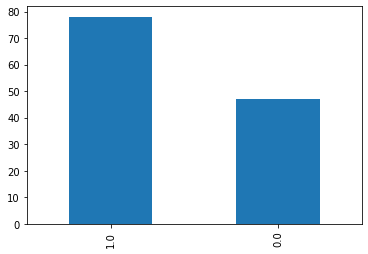

In [ ]:
y_train.value_counts().plot(kind='bar')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

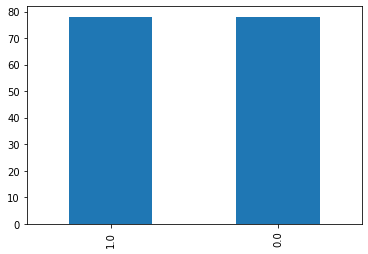

In [ ]:
y_train_over.value_counts().plot(kind='bar')

## modeling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score, confusion_matrix
DT = DecisionTreeClassifier(random_state = 42)
DT.fit(X_train,y_train)
pred_DT=DT.predict(X_test)
print(accuracy_score(y_test,pred_DT))
print(precision_score(y_test,pred_DT))
print(recall_score(y_test,pred_DT))
print(f1_score(y_test,pred_DT))
print(confusion_matrix(y_test,pred_DT, labels=[1,0]))

0.5416666666666666
0.631578947368421
0.64
0.6357615894039735
[[48 27]
 [28 17]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score, confusion_matrix
DT = DecisionTreeClassifier(random_state = 42)
DT.fit(X_train_over,y_train_over)
pred_DT=DT.predict(X_test)
print(accuracy_score(y_test,pred_DT))
print(precision_score(y_test,pred_DT))
print(recall_score(y_test,pred_DT))
print(f1_score(y_test,pred_DT))
print(confusion_matrix(y_test,pred_DT, labels=[1,0]))

0.5333333333333333
0.6301369863013698
0.6133333333333333
0.6216216216216216
[[46 29]
 [27 18]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
RF = RandomForestClassifier(random_state = 42)
RF.fit(X_train,y_train)
pred_FR=RF.predict(X_test)
print(accuracy_score(y_test,pred_FR))
print(precision_score(y_test,pred_FR))
print(recall_score(y_test,pred_FR))
print(f1_score(y_test,pred_FR))
print(confusion_matrix(y_test,pred_FR, labels=[1,0]))

0.5333333333333333
0.6067415730337079
0.72
0.6585365853658538
[[54 21]
 [35 10]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
RF = RandomForestClassifier(random_state = 42)
RF.fit(X_train_over,y_train_over)
pred_FR=RF.predict(X_test)
print(accuracy_score(y_test,pred_FR))
print(precision_score(y_test,pred_FR))
print(recall_score(y_test,pred_FR))
print(f1_score(y_test,pred_FR))
print(confusion_matrix(y_test,pred_FR, labels=[1,0]))

0.49166666666666664
0.5921052631578947
0.6
0.596026490066225
[[45 30]
 [31 14]]


In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel = "linear", random_state = 1, probability=True)
clf.fit(X_train,y_train)
#plot_decision_function(X_train, y_train, X_test, y_test, clf)
pred_clf=clf.predict(X_test)
print(accuracy_score(y_test,pred_clf))
print(precision_score(y_test,pred_clf))
print(recall_score(y_test,pred_clf))
print(f1_score(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf, labels=[1,0]))

0.5916666666666667
0.6477272727272727
0.76
0.6993865030674846
[[57 18]
 [31 14]]


In [ ]:
'''
from sklearn.svm import SVC
clf_ = SVC(kernel = "linear", random_state = 1)
clf.fit(X_train_over,y_train_over)
#plot_decision_function(X_train, y_train, X_test, y_test, clf)
pred_clf=clf.predict(X_test)
print(accuracy_score(y_test,pred_clf))
print(precision_score(y_test,pred_clf))
print(recall_score(y_test,pred_clf))
print(f1_score(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf, labels=[1,0]))
'''

'\nfrom sklearn.svm import SVC\nclf_ = SVC(kernel = "linear", random_state = 1)\nclf.fit(X_train_over,y_train_over)\n#plot_decision_function(X_train, y_train, X_test, y_test, clf)\npred_clf=clf.predict(X_test)\nprint(accuracy_score(y_test,pred_clf))\nprint(precision_score(y_test,pred_clf))\nprint(recall_score(y_test,pred_clf))\nprint(f1_score(y_test,pred_clf))\nprint(confusion_matrix(y_test,pred_clf, labels=[1,0]))\n'

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
print(accuracy_score(y_test,pred_lr))
print(precision_score(y_test,pred_lr))
print(recall_score(y_test,pred_lr))
print(f1_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr, labels=[1,0]))

0.575
0.6463414634146342
0.7066666666666667
0.6751592356687899
[[53 22]
 [29 16]]


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_over,y_train_over)
pred_lr=lr.predict(X_test)
print(accuracy_score(y_test,pred_lr))
print(precision_score(y_test,pred_lr))
print(recall_score(y_test,pred_lr))
print(f1_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr, labels=[1,0]))

0.575
0.6875
0.5866666666666667
0.6330935251798561
[[44 31]
 [20 25]]


In [ ]:
ada = AdaBoostClassifier(random_state = 42)
ada.fit(X_train,y_train)
pred_ada=ada.predict(X_test)
print(accuracy_score(y_test,pred_ada))
print(precision_score(y_test,pred_ada))
print(recall_score(y_test,pred_ada))
print(f1_score(y_test,pred_ada))
print(confusion_matrix(y_test,pred_ada, labels=[1,0]))

0.5333333333333333
0.6091954022988506
0.7066666666666667
0.6543209876543209
[[53 22]
 [34 11]]


In [ ]:
ada = AdaBoostClassifier(random_state = 42)
ada.fit(X_train_over,y_train_over)
pred_ada=ada.predict(X_test)
print(accuracy_score(y_test,pred_ada))
print(precision_score(y_test,pred_ada))
print(recall_score(y_test,pred_ada))
print(f1_score(y_test,pred_ada))
print(confusion_matrix(y_test,pred_ada, labels=[1,0]))

0.5583333333333333
0.6309523809523809
0.7066666666666667
0.6666666666666667
[[53 22]
 [31 14]]


In [ ]:
from xgboost import XGBClassifier as xgb
parms = {'max_depth' :3,\
         'eta':0.05,\
         'objective': 'binary:logistic',\
         'eval_metric':'recall'\
         }
num_rounds = 400
#eval_list= [(dtr,'train'), (dval, 'eval')] # 학습 데이터셋은 train 또는 평가 데이터 셋은 'eval'로  명기
#xgb_model = xgb.train(params=parms, dtrain= dtr, num_boost_round= num_rounds, early_stopping = 50, evals = eval_list)
xgb_model = xgb(n_estimators= 500, learning_rate = 0.1, max_depth = 4)
xgb_model.fit(X_train,y_train)
pred_xgb=xgb_model.predict(X_test)
print(accuracy_score(y_test,pred_xgb))
print(precision_score(y_test,pred_xgb))
print(recall_score(y_test,pred_xgb))
print(f1_score(y_test,pred_xgb))
print(confusion_matrix(y_test,pred_xgb, labels=[1,0]))

0.5416666666666666
0.6136363636363636
0.72
0.6625766871165645
[[54 21]
 [34 11]]


In [ ]:
from xgboost import XGBClassifier as xgb
parms = {'max_depth' :3,\
         'eta':0.05,\
         'objective': 'binary:logistic',\
         'eval_metric':'recall'\
         }
num_rounds = 400
#eval_list= [(dtr,'train'), (dval, 'eval')] # 학습 데이터셋은 train 또는 평가 데이터 셋은 'eval'로  명기
#xgb_model = xgb.train(params=parms, dtrain= dtr, num_boost_round= num_rounds, early_stopping = 50, evals = eval_list)
xgb_model = xgb(n_estimators= 500, learning_rate = 0.1, max_depth = 4)
xgb_model.fit(X_train_over,y_train_over)
pred_xgb=xgb_model.predict(X_test)
print(accuracy_score(y_test,pred_xgb))
print(precision_score(y_test,pred_xgb))
print(recall_score(y_test,pred_xgb))
print(f1_score(y_test,pred_xgb))
print(confusion_matrix(y_test,pred_xgb, labels=[1,0]))

0.525
0.6097560975609756
0.6666666666666666
0.6369426751592356
[[50 25]
 [32 13]]


In [ ]:
from lightgbm import LGBMClassifier
lgbm_400 = LGBMClassifier(n_estimators= 400)
evals = [(X_val, y_val)]
lgbm_400.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='recall', eval_set=evals, verbose=True)
pred_lgbm = lgbm_400.predict(X_test)
print(accuracy_score(y_test,pred_lgbm))
print(precision_score(y_test,pred_lgbm))
print(recall_score(y_test,pred_lgbm))
print(f1_score(y_test,pred_lgbm))
print(confusion_matrix(y_test,pred_lgbm, labels=[1,0]))

[1]	valid_0's binary_logloss: 0.652917
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.652977
[3]	valid_0's binary_logloss: 0.64865
[4]	valid_0's binary_logloss: 0.648253
[5]	valid_0's binary_logloss: 0.648121
[6]	valid_0's binary_logloss: 0.648106
[7]	valid_0's binary_logloss: 0.646693
[8]	valid_0's binary_logloss: 0.648512
[9]	valid_0's binary_logloss: 0.648226
[10]	valid_0's binary_logloss: 0.648138
[11]	valid_0's binary_logloss: 0.646908
[12]	valid_0's binary_logloss: 0.646502
[13]	valid_0's binary_logloss: 0.64781
[14]	valid_0's binary_logloss: 0.648711
[15]	valid_0's binary_logloss: 0.645203
[16]	valid_0's binary_logloss: 0.64648
[17]	valid_0's binary_logloss: 0.645846
[18]	valid_0's binary_logloss: 0.645809
[19]	valid_0's binary_logloss: 0.646786
[20]	valid_0's binary_logloss: 0.64601
[21]	valid_0's binary_logloss: 0.644301
[22]	valid_0's binary_logloss: 0.644294
[23]	valid_0's binary_logloss: 0.643093
[24]	valid_0's binary_logloss: 

In [ ]:
'''
from lightgbm import LGBMClassifier
lgbm_400_over = LGBMClassifier(n_estimators= 400)
evals = [(X_val, y_val)]
lgbm_400_over.fit(X_train_over, y_train_over, early_stopping_rounds=10, eval_metric='recall', eval_set=evals, verbose=True)
pred_lgbm = lgbm_400_over.predict(X_test)
print(accuracy_score(y_test,pred_lgbm))
print(precision_score(y_test,pred_lgbm))
print(recall_score(y_test,pred_lgbm))
print(f1_score(y_test,pred_lgbm))
print(confusion_matrix(y_test,pred_lgbm, labels=[1,0]))
'''

"\nfrom lightgbm import LGBMClassifier\nlgbm_400_over = LGBMClassifier(n_estimators= 400)\nevals = [(X_val, y_val)]\nlgbm_400_over.fit(X_train_over, y_train_over, early_stopping_rounds=10, eval_metric='recall', eval_set=evals, verbose=True)\npred_lgbm = lgbm_400_over.predict(X_test)\nprint(accuracy_score(y_test,pred_lgbm))\nprint(precision_score(y_test,pred_lgbm))\nprint(recall_score(y_test,pred_lgbm))\nprint(f1_score(y_test,pred_lgbm))\nprint(confusion_matrix(y_test,pred_lgbm, labels=[1,0]))\n"

## Semi-Supervised learning

In [ ]:
X_unlabeled = unlabeled_df.drop('DF2_pr', axis = 1)

In [ ]:
X_unlabeled = Scaler.transform(X_unlabeled)

In [ ]:
X_unlabeled = pd.DataFrame(X_unlabeled)

In [ ]:
lgbm_400.predict_proba(X_test)

array([[0.33472582, 0.66527418],
       [0.43404625, 0.56595375],
       [0.19559338, 0.80440662],
       [0.15194298, 0.84805702],
       [0.2292068 , 0.7707932 ],
       [0.19841678, 0.80158322],
       [0.32147633, 0.67852367],
       [0.35032217, 0.64967783],
       [0.54900715, 0.45099285],
       [0.29076395, 0.70923605],
       [0.31791324, 0.68208676],
       [0.45105186, 0.54894814],
       [0.18396428, 0.81603572],
       [0.42345254, 0.57654746],
       [0.45545182, 0.54454818],
       [0.50205281, 0.49794719],
       [0.33244666, 0.66755334],
       [0.66729613, 0.33270387],
       [0.27118365, 0.72881635],
       [0.07933413, 0.92066587],
       [0.41599916, 0.58400084],
       [0.72331586, 0.27668414],
       [0.32425028, 0.67574972],
       [0.35779346, 0.64220654],
       [0.51857762, 0.48142238],
       [0.49334279, 0.50665721],
       [0.57545887, 0.42454113],
       [0.41452399, 0.58547601],
       [0.33458915, 0.66541085],
       [0.57146009, 0.42853991],
       [0.

In [ ]:
pd.DataFrame(lgbm_400.predict_proba(X_unlabeled)).describe()

,0,1
count,5083.000000,5083.000000
mean,0.556418,0.443582
std,0.193627,0.193627
min,0.039697,0.121245
25%,0.415082,0.286555
50%,0.589573,0.410427
75%,0.713445,0.584918
max,0.878755,0.960303


In [ ]:
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.500,1.0,0.066667,0.000000,0.666667,1.0,0.6,0.0,0.0,1.000000,0.50,1.0,0.000000,1.0,1.0,1.0
1,0.250,1.0,0.716667,0.666667,0.000000,0.0,0.2,0.0,1.0,0.000000,0.75,0.0,1.000000,1.0,0.0,1.0
2,0.000,1.0,0.516667,1.000000,1.000000,0.0,0.2,0.0,0.5,0.000000,0.50,1.0,0.285714,1.0,1.0,1.0
3,0.000,1.0,0.766667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.111111,0.50,1.0,1.000000,1.0,0.0,1.0
4,0.875,1.0,0.816667,0.000000,0.000000,1.0,0.2,0.0,0.5,0.000000,0.50,1.0,1.000000,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.500,1.0,0.450000,0.000000,1.000000,1.0,0.8,0.0,0.0,0.000000,0.50,1.0,0.142857,1.0,0.0,1.0
121,0.500,1.0,0.033333,0.666667,0.666667,1.0,0.4,0.0,0.5,1.000000,0.75,1.0,0.285714,0.0,1.0,0.0
122,0.500,1.0,0.566667,0.000000,0.666667,0.0,0.2,0.0,0.5,0.000000,0.50,1.0,0.285714,1.0,1.0,1.0
123,0.875,1.0,0.833333,0.666667,0.666667,1.0,0.2,0.0,1.0,0.000000,0.75,1.0,0.000000,1.0,0.0,1.0


In [ ]:
clf.predict_proba(X_test)

array([[0.34440971, 0.65559029],
       [0.42877398, 0.57122602],
       [0.36652002, 0.63347998],
       [0.2725029 , 0.7274971 ],
       [0.33687346, 0.66312654],
       [0.35975728, 0.64024272],
       [0.37716754, 0.62283246],
       [0.36826362, 0.63173638],
       [0.3878953 , 0.6121047 ],
       [0.29958592, 0.70041408],
       [0.38861964, 0.61138036],
       [0.40650863, 0.59349137],
       [0.36011003, 0.63988997],
       [0.36283749, 0.63716251],
       [0.4245188 , 0.5754812 ],
       [0.47173439, 0.52826561],
       [0.35519334, 0.64480666],
       [0.44356566, 0.55643434],
       [0.31835327, 0.68164673],
       [0.30508671, 0.69491329],
       [0.3534417 , 0.6465583 ],
       [0.50637303, 0.49362697],
       [0.41120618, 0.58879382],
       [0.40153405, 0.59846595],
       [0.47836372, 0.52163628],
       [0.38242106, 0.61757894],
       [0.50922542, 0.49077458],
       [0.38140392, 0.61859608],
       [0.35345065, 0.64654935],
       [0.40313438, 0.59686562],
       [0.

In [ ]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
#train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1]

# Loop will run until there are no more high-probability pseudo-labels

while len(high_prob) > 0:
    # Fit classifier and make train/test predictions
    clf = SVC(kernel = "linear", random_state = 1, probability=True)
    clf.fit(X_train,y_train)
    #plot_decision_function(X_train, y_train, X_test, y_test, clf)
    pred_clf=clf.predict(X_test)

    #lgbm_400 = LGBMClassifier(n_estimators= 400)
    #evals = [(X_val, y_val)]
    #lgbm_400.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='recall', eval_set=evals, verbose=True)
    #pred_lgbm = lgbm_400.predict(X_test)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    #train_f1 = f1_score(y_train, y_hat_train)
    test_f1 = f1_score(y_test, pred_clf)
    print(f"Iteration {iterations}")

    #train_f1s.append(train_f1)
    test_f1s.append(test_f1)

    # Generate predictions and probabilities for unlabeled data

    if len(X_unlabeled)>0 :
      print(f"Now predicting labels for unlabeled data...")

      print(len(X_unlabeled))
      pred_probs = clf.predict_proba(X_unlabeled)
      preds = clf.predict(X_unlabeled)
      prob_0 = pred_probs[:,0]
      prob_1 = pred_probs[:,1]

      # Store predictions and probabilities in dataframe
      df_pred_prob = pd.DataFrame([])
      df_pred_prob['preds'] = preds
      df_pred_prob['prob_0'] = prob_0
      df_pred_prob['prob_1'] = prob_1
      df_pred_prob.index = X_unlabeled.index

      # Separate predictions with > 99% probability
      high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.65],
                            df_pred_prob.loc[df_pred_prob['prob_1'] > 0.65]],
                            axis=0)
      print(f"{len(high_prob)} high-probability predictions added to training data.")

      pseudo_labels.append(len(high_prob))

      # Add pseudo-labeled data to training data
      X_train = pd.concat([X_train, X_unlabeled.loc[high_prob.index]], axis=0)
      y_train = pd.concat([y_train, high_prob.preds], axis=0)

      index = np.arange(0, len(X_train))
      index = np.random.shuffle(index)

      X_train = X_train.values
      y_train = y_train.values

      X_train = X_train[index].reshape(-1, 16)
      y_train = y_train[index].reshape(-1, 1)

      X_train = pd.DataFrame(X_train)
      y_train = pd.DataFrame(y_train)


      # Drop pseudo-labeled instances from unlabeled data
      X_unlabeled = X_unlabeled.drop(index=high_prob.index)
      print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")

      print(accuracy_score(y_test,pred_clf))
      print(precision_score(y_test,pred_clf))
      print(recall_score(y_test,pred_clf))
      print(f1_score(y_test,pred_clf))

    # Update iteration counter
    #if len(high_prob) == 0 and iterations > 0:
      #break

    iterations += 1
    #if len(X_unlabeled) == 0 and iterations > 0:
      #break

Iteration 0
Now predicting labels for unlabeled data...
5083
436 high-probability predictions added to training data.
4647 unlabeled instances remaining.

0.5916666666666667
0.6477272727272727
0.76
0.6993865030674846
Iteration 1
Now predicting labels for unlabeled data...
4647
3482 high-probability predictions added to training data.
1165 unlabeled instances remaining.

0.6
0.6551724137931034
0.76
0.7037037037037037
Iteration 2
Now predicting labels for unlabeled data...
1165
839 high-probability predictions added to training data.
326 unlabeled instances remaining.

0.5916666666666667
0.6413043478260869
0.7866666666666666
0.7065868263473053
Iteration 3
Now predicting labels for unlabeled data...
326
106 high-probability predictions added to training data.
220 unlabeled instances remaining.

0.6
0.651685393258427
0.7733333333333333
0.7073170731707319
Iteration 4
Now predicting labels for unlabeled data...
220
43 high-probability predictions added to training data.
177 unlabeled instanc

In [ ]:
list(range(iterations))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
test_f1s

[0.6993865030674846,
 0.7037037037037037,
 0.7065868263473053,
 0.7073170731707319,
 0.7116564417177914,
 0.7116564417177914,
 0.7116564417177914,
 0.7116564417177914,
 0.7116564417177914,
 0.7116564417177914,
 0.7116564417177914]

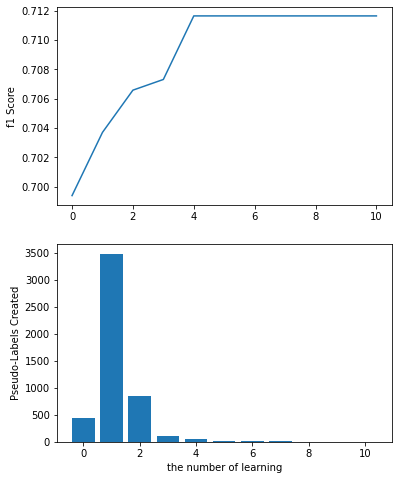

In [ ]:
# Plot f1 scores and number of pseudo-labels added for all iterations

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
ax1.plot(list(range(iterations)), test_f1s)
ax1.set_ylabel('f1 Score')
ax2.set_xlabel('the number of learning');
ax2.bar(list(range(iterations)), height=pseudo_labels)
ax2.set_ylabel('Pseudo-Labels Created')
ax2.set_xlabel('the number of learning');
#ax3.plot(range(iterations), test_accs)
#ax1.set_ylabel('accuracy')

# View confusion matrix after self-training

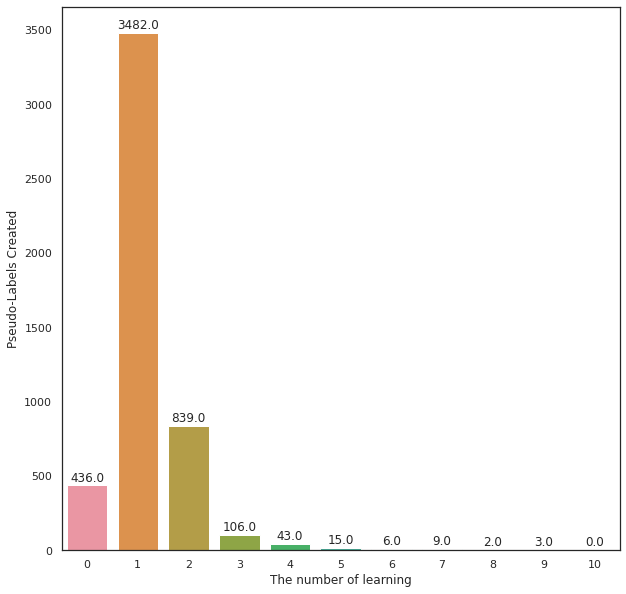

In [ ]:
sns.set_style("white")
ax = sns.barplot(x=list(range(iterations)), y=pseudo_labels)
ax.set_xlabel('The number of learning')
ax.set_ylabel('Pseudo-Labels Created')
sns.set(rc = {'figure.figsize':(10,10)})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
plt.show()

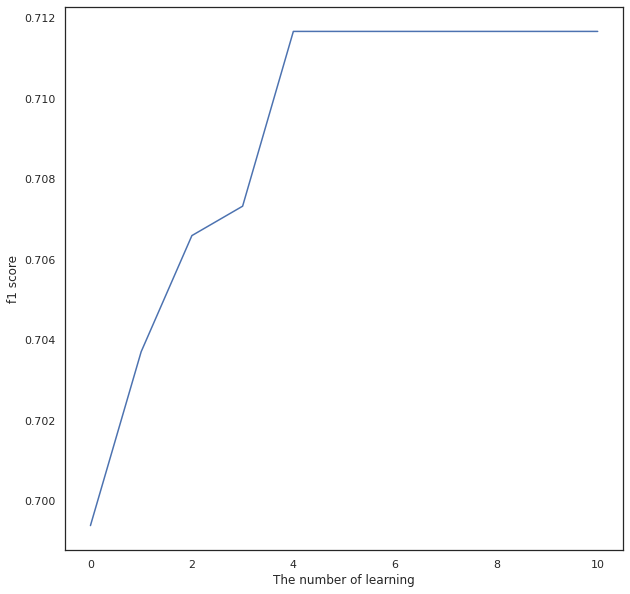

In [ ]:
sns.set_style("white")
ax = sns.lineplot(x=list(range(iterations)), y=test_f1s)
ax.set_xlabel('The number of learning')
ax.set_ylabel('f1 score')
sns.set(rc = {'figure.figsize':(10,10)})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
plt.show()